In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('IMDb Movies India.csv',encoding='latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.shape

(5659, 10)

In [8]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [9]:
df['Director'].groupby(df['Name']).count()

Name
#Gadhvi (He thought he was Gandhi)    1
#Yaaram                               1
'Ferry'                               1
...Aur Pyaar Ho Gaya                  1
...Yahaan                             1
                                     ..
Zubaan                                1
Zubeidaa                              1
Zulm Ki Zanjeer                       1
Zulm-O-Sitam                          1
Zulmi                                 1
Name: Director, Length: 5385, dtype: int64

In [10]:
from string import punctuation

In [11]:
def year(x):
    k=""
    for i in x:
        if i not in punctuation:
            k+=i
    return k

In [12]:
df['Year']=df['Year'].apply(lambda x:year(x)).astype('int64')

In [13]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [14]:
from collections import Counter

In [15]:
count=Counter(df['Genre'])

In [16]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'count')

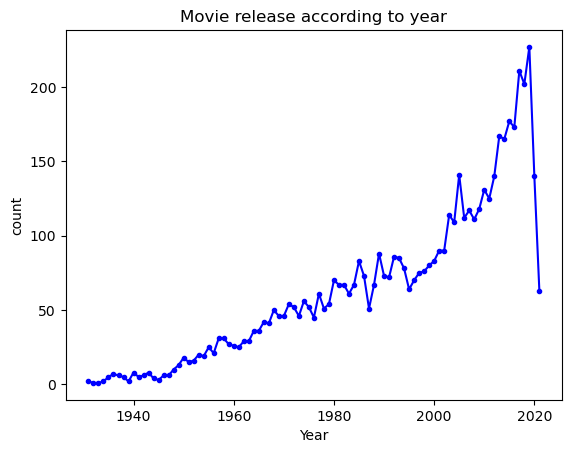

In [17]:
l=[year for year,name in df['Name'].groupby(df['Year']).count().items()]
plt.plot(l,df['Name'].groupby(df['Year']).count().values,'.-b')
plt.title("Movie release according to year")
plt.xlabel("Year")
plt.ylabel('count')

In [18]:
df['Genre'].nunique()

376

(array([286.,  30.,  14.,   8.,   7.,   1.,   6.,   4.,   2.,   0.,   1.,
         2.,   1.,   0.,   1.,   0.,   2.,   0.,   1.,   1.,   0.,   0.,
         0.,   0.,   1.,   0.,   1.,   0.,   2.,   0.,   0.,   2.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]), array([  1.        ,   7.48461538,  13.96923077,  20.45384615,
        26.93846154,  33.42307692,  39.90769231,  46.39230769,
       

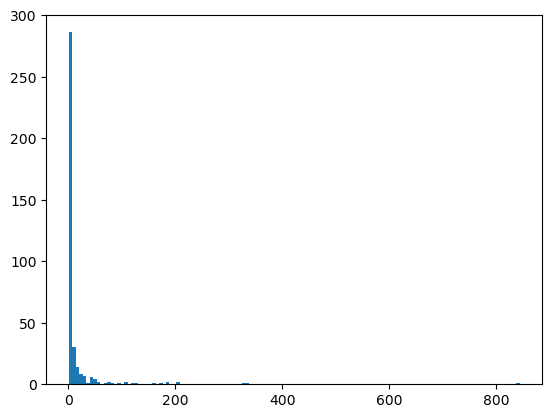

In [19]:
print(plt.hist(sorted(df['Rating'].groupby(df['Genre']).count(),reverse=True),bins=130))

In [20]:
def duration(x):
    k=""
    for i in x:
        if i.isdigit():
            k+=i
    return k

In [21]:
df['Duration']=df['Duration'].apply(lambda x:duration(x)).astype('int32')

In [22]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le=LabelEncoder()
df['Genre']=le.fit_transform(df['Genre'])

In [25]:
def votes(x):
    k=""
    for i in x:
        if i not in punctuation:
            k+=i
    return k

In [26]:
df['Votes']=df['Votes'].apply(lambda x:votes(x))

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x=df.loc[:,['Year','Duration','Votes','Genre']]
y=df['Rating']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [29]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4527, 4), (1132, 4), (4527,), (1132,))

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
rfc=RandomForestRegressor()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

In [32]:
rfc.score(x_test,y_test)

0.330887564883244

In [56]:
def predict(year,duration,votes,genre):
    genre=le.transform(["Drama"])[0]
    return rfc.predict([[year,duration,votes,genre]])

In [57]:
print(predict(2003,103,6.6,1))

[5.218]


C:\Users\karthick\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
